In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
market_raw = pd.read_csv("/content/drive/MyDrive/05 - Job Prepare/04 - Portfolio Project/02_marketing_ab_testing/marketing_AB.csv", index_col = 0)

# **1. Introduction**

Evaluating the Effectiveness of Marketing Campaigns on User Conversion




## 1.1 Problem Statement
As a digital marketing team, our objective is to assess the impact of new advertisements on user conversion rates.
The analysis aims to determine if the marketing campaign contributes to enhanced user conversion, thereby informing decisions about its effectiveness.


## 1.2 Experimental Design & Data Definition
The majority of users constitute the experimental group, exposed to new advertisements.
A small portion of users form the control group, where they are exposed to a Public Service Announcement (PSA) or nothing in the same size and placement as the ad.

In this project, the target matric(i.e. dependent variable) is the **conversion rate**, defined by the boolean variable **converted**:


> **True: User bought the product.**

> **False: User did not buy the product.**

\


The rest of **Data dictionary** are as follow:

| Column name | Description |
| --- | --- |
| user id |  User ID (Primary Key) |
| test group |If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement |
| total ads | Amount of ads seen by person |
| most ads day | Day that the person saw the biggest amount of ads| 
| most ads hour | Hour of day that the person saw the biggest amount of ads |

The entire dataset was from [Kaggle](https://www.kaggle.com/faviovaz/marketing-ab-testing).

---

# **2. Hypothesis Testing**

The second step of our analysis is to state our hypothesis, ensuring the data interpretation is precise and rigorous. In our project, since we do not know whether the ads enhances or decreases the conversion rate, a two-tailed test was performed.






## 2.1 State the hypothesis statement

The null hypothesis is that the mean conversion rate of experimental group is as same as the one of control group. The alternative hypothesis is that the two means are statistically different.



> **H0: mu = mu0**

> **H1: mu != mu0**

## 2.2 Set the significance level

Here, the confidence level is 95%, which means **"the percentage of probability that the confidence interval would contain the true population mean when you draw a random sample many times."**

> **α = 0.05**

Say, if the p-value of our result is smaller than α(0.05), then we reject the null hypothesis.

## 2.3 Set the statistical power

This shows the probability of detecting an effect if the alternative hypothesis is true.

> **statistical power = 0.8**


## 2.4 Set the minimum detectable effect (MDE)



---

# **3. Design Experiment**







## 3.1 Set randomization unit
 individual user

## 3.2 Target population
visitor of the website

## 3.3 Duration
Assume the campaign is 2 months

## 3.4 Sample Size

> n ~= (16σ^2)/(σ)^2

formula based on α = 0.05 and power = 0.8


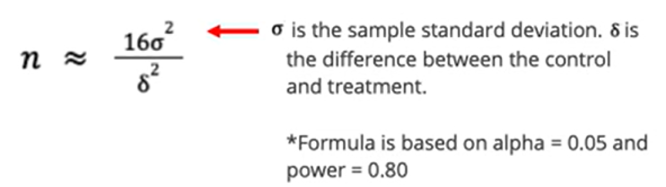
---



# **4. Data Validity & Analysis**




## 4.1 Data Wrangling
In this section, we will ensure all the data are cleaned, having no duplicates, missing values, abnormal values in the dataset. Moreover, the type of each variable should be appropriate for further analysis.

In [3]:
print(f"Shape {market_raw.shape}")
market_raw

Shape (588101, 6)


,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23
588099,1496395,ad,False,1,Tuesday,23


In [4]:
market_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 27.5+ MB


In [5]:
# Check Missing Values
market_raw.isna().sum() # No missing values

user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [6]:
# Check Duplicate
market_raw.duplicated().sum() # No duplicate

0

In [7]:
# Ensure no user is counted/appeared over once
appearCnt = market_raw.value_counts('user id')
print(f'Users appear over once in dataset : {appearCnt[appearCnt > 1].count()} user(s).')

Users appear over once in dataset : 0 user(s).


In [8]:
# Check categorical col value
print(f"""Test group: {market_raw['test group'].unique()}
most ads day: {market_raw['most ads day'].unique()}
      """)

Test group: ['ad' 'psa']
most ads day: ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
      


In [9]:
# View the basic statistical summary fo the data
market_raw.describe(include = "all")

,user id,test group,converted,total ads,most ads day,most ads hour
count,5.881010e+05,588101,588101,588101.000000,588101,588101.000000
unique,NaN,2,2,NaN,7,NaN
top,NaN,ad,False,NaN,Friday,NaN
freq,NaN,564577,573258,NaN,92608,NaN
mean,1.310692e+06,NaN,NaN,24.820876,NaN,14.469061
std,2.022260e+05,NaN,NaN,43.715181,NaN,4.834634
min,9.000000e+05,NaN,NaN,1.000000,NaN,0.000000
25%,1.143190e+06,NaN,NaN,4.000000,NaN,11.000000
50%,1.313725e+06,NaN,NaN,13.000000,NaN,14.000000
75%,1.484088e+06,NaN,NaN,27.000000,NaN,18.000000


In [10]:
# Convert "Most ads hour" into categorical variables
market = market_raw.copy()
market['most ads hour'] = market['most ads hour'].astype("category")

In [11]:
# Convert "converted" into 1, 0 integer value
market.loc[(market.converted == True),  'converted'] = 1
market.loc[(market.converted == False),  'converted'] = 0
market["converted"] = market["converted"].astype(int)
market.rename({'user id':'user_id', 'test group':'test_group', 'total ads':'total_ads', 'most ads day':'most_ads_day', 'most ads hour':'most_ads_hour'}, axis = 1, inplace = 1)
market = market[['user_id', 'test_group', 'total_ads', 'most_ads_day', 'most_ads_hour', 'converted']]
market

,user_id,test_group,total_ads,most_ads_day,most_ads_hour,converted
0,1069124,ad,130,Monday,20,0
1,1119715,ad,93,Tuesday,22,0
2,1144181,ad,21,Tuesday,18,0
3,1435133,ad,355,Tuesday,10,0
4,1015700,ad,276,Friday,14,0
...,...,...,...,...,...,...
588096,1278437,ad,1,Tuesday,23,0
588097,1327975,ad,1,Tuesday,23,0
588098,1038442,ad,3,Tuesday,23,0
588099,1496395,ad,1,Tuesday,23,0


In [12]:
market.describe(include = "all")

,user_id,test_group,total_ads,most_ads_day,most_ads_hour,converted
count,5.881010e+05,588101,588101.000000,588101,588101.0,588101.000000
unique,NaN,2,NaN,7,24.0,NaN
top,NaN,ad,NaN,Friday,13.0,NaN
freq,NaN,564577,NaN,92608,47655.0,NaN
mean,1.310692e+06,NaN,24.820876,NaN,NaN,0.025239
std,2.022260e+05,NaN,43.715181,NaN,NaN,0.156850
min,9.000000e+05,NaN,1.000000,NaN,NaN,0.000000
25%,1.143190e+06,NaN,4.000000,NaN,NaN,0.000000
50%,1.313725e+06,NaN,13.000000,NaN,NaN,0.000000
75%,1.484088e+06,NaN,27.000000,NaN,NaN,0.000000


In [13]:
# check data type
market.applymap(type).apply(pd.value_counts).fillna(0)

,user_id,test_group,total_ads,most_ads_day,most_ads_hour,converted
<class 'int'>,588101.0,0.0,588101.0,0.0,588101.0,588101.0
<class 'str'>,0.0,588101.0,0.0,588101.0,0.0,0.0



The next step involves the normalization of the columns “total ads" where values exceed a z-score threshold of 3 or fall below -3 are considered as outliers and consequently removed from the dataset.


After all the data cleaning and transforming, the dataset remains 578,070 rows and 6 columns.

In [14]:
# Remove outlier
z_scores = stats.zscore(market['total_ads'])
filtered_entries = (np.abs(z_scores) < 3)
market = market[filtered_entries]
print(f"Data shape after data cleaning: {market.shape}")

Data shape after data cleaning: (578070, 6)


In [15]:
market.head()

,user_id,test_group,total_ads,most_ads_day,most_ads_hour,converted
0,1069124,ad,130,Monday,20,0
1,1119715,ad,93,Tuesday,22,0
2,1144181,ad,21,Tuesday,18,0
7,1496843,ad,17,Sunday,18,0
8,1448851,ad,21,Tuesday,19,0


In [16]:
market.groupby('test_group').count().iloc[:,0]
# The counts in experimental group and control group were 554,998 and 23,072, respectively.

test_group
ad     554998
psa     23072
Name: user_id, dtype: int64

In [17]:
# Calculate conversion rate in each group
prob_ad = market[(market['converted']==True) & (market['test_group']=='ad')]['user_id'].count()/len(market[market['test_group']=='ad'])
prob_psa = market[(market['converted']==True) & (market['test_group']=='psa')]['user_id'].count()/len(market[market['test_group']=='psa'])
print(f"AD conversion rate: {round(prob_ad*100,2)} %")
print(f"PSA conversion rate: {round(prob_psa*100,2)} %")

AD conversion rate: 2.32 %
PSA conversion rate: 1.55 %


## **4.2 Chi-Square Goodness-of-fit Test**

The next step is to check the Chi-square goodness-of-fit test(randomization), which is to ensure the distribution of participants between control and treatment groups remain consistent across various behavioral variables such as age, gender, etc. In our cases, the variable will be "most ads days" and "most ads hour". This prevents these factors from influencing the evaluation fo metric changes.



### 4.2.1 Methods of evaluation:
1. **Statistical test**: T-tests for numerical data, and chi-square test for categorical data to assess group balance.

2. **Tree model approach**: A more efficient method which utilize a tree model to differentiate between Control and Treatment group. If certain variable can effectively distinguish between the group, it indicates an imbalance within these variables across control and treatment groups.

3. **Propensity Model**: If the above approaches shows control and treatment group are not balanced, emplaying a propensity model can help match individuals across control and treatment groups with similar propensities, thereby ensuring a more balanced distribution of covariates and reducing potential bias.

In [18]:
df_control = market[market['test_group']=='psa']
df_treat = market[market['test_group']=='ad']

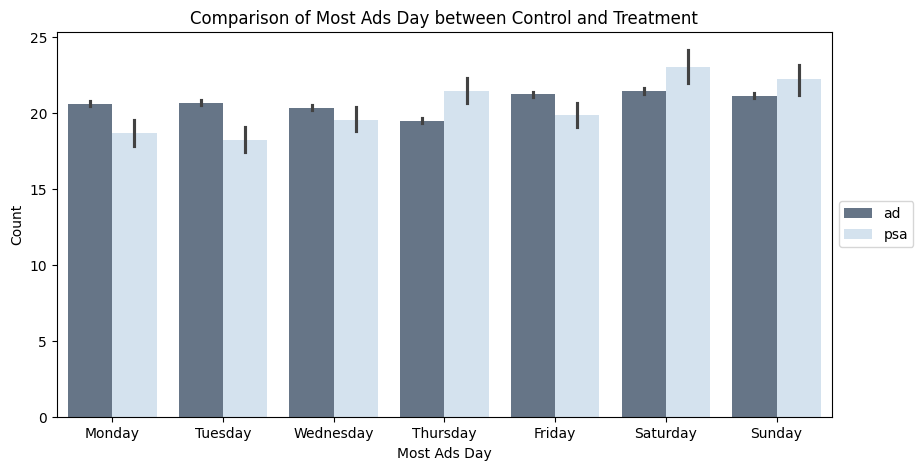

In [19]:
# Define figure size
plt.subplots(figsize = (10,5))

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
colors = ["#61748C", "#D0E2F2"]

sns.barplot(data=market, x='most_ads_day', y='total_ads', hue='test_group', order=days_order, palette=colors)

# Add legends, labels, and titles
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Comparison of Most Ads Day between Control and Treatment')
plt.xlabel('Most Ads Day')
plt.ylabel('Count')

plt.show()

From the density bar chart, we can see there's slightly difference between control and treatment group. Thus, I would like to use 1. Statistial method to calculate the expected user count in control/ treatment group.

In [20]:
# Calculate Expected "most_ads_day" count for control group for each weekday
df_ad_days = pd.concat([df_control[['most_ads_day','test_group']], df_treat[['most_ads_day','test_group']]])

exp_control = round(df_ad_days.groupby('most_ads_day').size()/len(df_ad_days)*len(df_control), 0)
exp_control

most_ads_day
Friday       3616.0
Monday       3409.0
Saturday     3207.0
Sunday       3359.0
Thursday     3259.0
Tuesday      3048.0
Wednesday    3174.0
dtype: float64

In [21]:
control_day_cnt = df_control.groupby('most_ads_day').size()
control_day_cnt

most_ads_day
Friday       3719
Monday       3425
Saturday     2795
Sunday       3013
Thursday     3818
Tuesday      2867
Wednesday    3435
dtype: int64

In [22]:
# Calculate Expected "most_ads_day" count for treatment group for each weekday
exp_treat = round(df_ad_days.groupby('most_ads_day').size()/len(df_ad_days)*len(df_treat), 0)
exp_treat

most_ads_day
Friday       86973.0
Monday       81994.0
Saturday     77141.0
Sunday       80799.0
Thursday     78403.0
Tuesday      73328.0
Wednesday    76360.0
dtype: float64

In [23]:
treat_day_cnt = df_treat.groupby('most_ads_day').size()
treat_day_cnt

most_ads_day
Friday       86870
Monday       81978
Saturday     77553
Sunday       81145
Thursday     77844
Tuesday      73509
Wednesday    76099
dtype: int64

In [24]:
# Chi-square scores for control group among all weekdays
(control_day_cnt - exp_control)**2/exp_control

most_ads_day
Friday        2.933905
Monday        0.075095
Saturday     52.929217
Sunday       35.640369
Thursday     95.882479
Tuesday      10.748360
Wednesday    21.462193
dtype: float64

In [25]:
# Chi-square scores for treatment group among all weekdays
(treat_day_cnt - exp_treat)**2/exp_treat

most_ads_day
Friday       0.121980
Monday       0.003122
Saturday     2.200438
Sunday       1.481652
Thursday     3.985575
Tuesday      0.446773
Wednesday    0.892103
dtype: float64

In [26]:
# Calculate Chi-Square Test Statistics
((control_day_cnt - exp_control)**2/exp_control).sum() + ((treat_day_cnt - exp_treat)**2/exp_treat).sum()

228.8032622349154

Before getting the P-value, we need to know the degree of freedom(dof)
the formula:

> (Row - 1)*(column - 1)
= (2-1)*(7-1) = 6

After getting the chi-square test statistic and dof, we can calculate P-value to make conclusion. We can also apply package to calculate the P-value of chi-square score as follow:

In [27]:
from scipy.stats import chi2_contingency

chi_result = chi2_contingency([control_day_cnt, treat_day_cnt])
print(f"""Chi Square statistic: {round(chi_result[0],2)}
P-value: {chi_result[1]}
Dof: {chi_result[2]}
      """)

Chi Square statistic: 228.64
P-value: 1.4962223341698505e-46
Dof: 6
      


**Samples are not ranomized**
\
Based on the result, the Chi-Square score of 230 and nearly 0 p-value demonstrate a significant difference between the groups. There is a substantial variation in the "most ads weekdays" distribution between the control and treatment groups, meaning the samples are not randomly distributed from the population.

---



### 4.2.2 Decision Tree for randomization check

By implementing the decision tree, we can also efficiently check the randomization of the samples.

Reference: [Pricing Test AB Testing](https://github.com/bertmclee/AB_Testing_Pricing_Test/blob/main/Pricing_Test_AB_Testing.ipynb)

In [28]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
import random

# Set the seed
random.seed(2024)

In [29]:
# Make dummy variables
df_results_dummy = pd.get_dummies(market, columns=['most_ads_day','most_ads_hour'])

# For modeling, only requires dummy variables "most_ads_day" and "most_ads_hour" to validate whether the distribution is randomized
train_cols = df_results_dummy.drop(['user_id','test_group','total_ads','converted'], axis=1).fillna(0)

tree = DecisionTreeClassifier(
    # change_class weights to "balanced" to make the conversion result balanced. Without adding this, the algorithm might prioritize accuracy and simply predict 0 as conversion for every instance.
    class_weight = "balanced",

    # min_impurity_decrease sets a threshold for the impurity decrease. If the impurity decrease resulting from splitting a node is less than this threshold,
    # the node will not be split further, and it will become a leaf node.
    # To prevent model being too complex and overfitting.
    min_impurity_decrease = 0.0001,
    max_depth = 3
    )
tree.fit(train_cols, market['test_group'])

DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       min_impurity_decrease=0.0001)

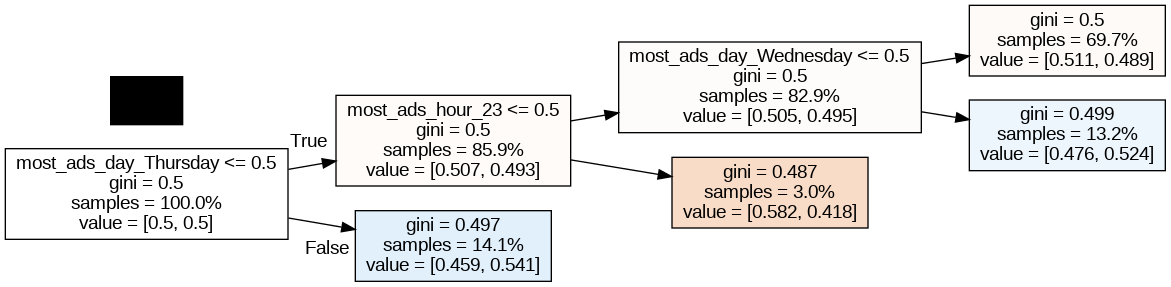

In [30]:
from IPython.display import Image
import pydotplus

# Visualize the Tree on notebook
dot_data = export_graphviz(tree, feature_names = train_cols.columns, proportion = True, rotate = True, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

From the decision tree model, we can see there's slightly imbalance in the distribution of "most_ads_day". For instance, for users having most_ads_day on Thursday, there's higher chance for them to be in treatment group (ie. 54.1%>45.9%). For users with most_ads_day on Thursday 23:00, there's also higher chance to be in control group (ie. 58.2% > 41.8%).

### 4.2.3 Conclusion for Randomization check
From both method, it shows the sample is not balanced among most_ads_day and most_ads_hourm, which might affects the experiment result.

We will suggest the team to
1. **enhance the algorithm** that assigns users to control/ treatment group based on most_ads_days and most_ads_hour

2. **increase additional variables** such as gender, user location, age, etc. to gain more insights into user behavior and demographics,

by enhancing the randomization, which can prevent over/under representation of certain segments for AB testing results.


---



## 4.3 Instrumentation effect:
Check the guardrail metrics

In the dataset, there's no guardrail metrics to track. Thus, we will suggest the team to add metrics such as

1. Bounce rate - the percentage of users who navigate away from the website after viewing the advertisement or PSA. A higher bounce rate in the treatment group could suggest that the ad is not effectively capturing user interest.

2. Page load time - Measure the time it takes for the webpage to load after users are exposed to the ad or PSA. A substantial increase in page load time in treatment group may indicate technical issues with the ad taht could negatively impact user experience.


---



# **5. Data Exploration & Visualization**

In this section, I simply calculate the **statistic features** between both groups, and provide data subsetting for creating different matrics in further feature engineering.


## 5.1 Conversion distribution

Barplot of conversion rate between the two groups

* **Findings**:

Conversion Rate Disparity: A noticeable difference in conversion rates is observed between the control (PSA) and treatment (Advertisement) groups. The conversion rate for the control group is significantly lower at 1.55%, while the treatment group exhibits a higher conversion rate of 2.32%.

<ipython-input-31-05a7f208d03b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = market['test_group'], y = market['converted'], ci = False, color = colors[1])


Text(0, 0.5, 'Converted (proportion)')

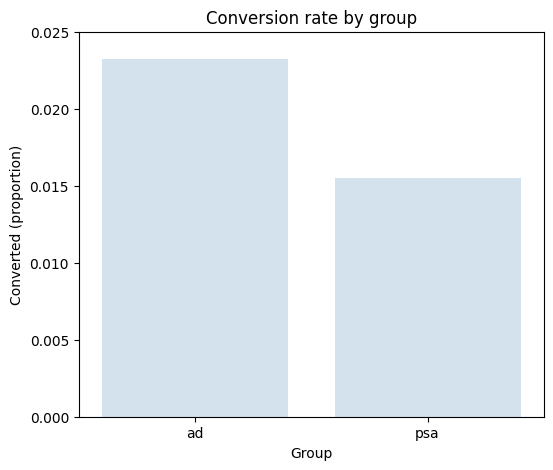

In [31]:
plt.figure(figsize=(6, 5))
sns.barplot(x = market['test_group'], y = market['converted'], ci = False, color = colors[1])
plt.ylim(0, 0.025)
plt.title('Conversion rate by group')
plt.xlabel('Group')
plt.ylabel('Converted (proportion)')

In [32]:
# Data Subsetting - to calculate different metric
# Create a pivot table based on "test group", "converted", "most ads day", " most ads hour", and calculate the count of each dimension.

pivot_df = pd.pivot_table(data = market, values = 'user_id', index=['test_group','converted','most_ads_day','most_ads_hour'], aggfunc='count')
pivot_df.reset_index(inplace=True)
pivot_df

,test_group,converted,most_ads_day,most_ads_hour,user_id
0,ad,0,Friday,0,775
1,ad,0,Friday,1,635
2,ad,0,Friday,2,799
3,ad,0,Friday,3,504
4,ad,0,Friday,4,112
...,...,...,...,...,...
667,psa,1,Wednesday,19,2
668,psa,1,Wednesday,20,3
669,psa,1,Wednesday,21,2
670,psa,1,Wednesday,22,2


In [33]:
# Add proportion of most ads hour
ad_hour_prop = pivot_df.loc[pivot_df['test_group']=='ad']['user_id']/sum(pivot_df.loc[pivot_df['test_group']=='ad']['user_id'])*100
psa_hour_prop = pivot_df.loc[pivot_df['test_group']=='psa']['user_id']/sum(pivot_df.loc[pivot_df['test_group']=='psa']['user_id'])*100
ad_hour_prop = pd.DataFrame(ad_hour_prop)
psa_hour_prop = pd.DataFrame(psa_hour_prop)

In [34]:
hour_prop = pd.concat([ad_hour_prop, psa_hour_prop])
hour_prop.rename(columns={'user_id':'hour_prop'}, inplace=True)
print(hour_prop.head())

   hour_prop
0   0.139640
1   0.114415
2   0.143964
3   0.090811
4   0.020180


In [35]:
pivot_df = pd.concat([pivot_df, hour_prop], axis=1)
pivot_df.rename({'user_id':'userCnt'}, inplace = True, axis = 1)
print(pivot_df.head())

  test_group  converted most_ads_day most_ads_hour  userCnt  hour_prop
0         ad          0       Friday             0      775   0.139640
1         ad          0       Friday             1      635   0.114415
2         ad          0       Friday             2      799   0.143964
3         ad          0       Friday             3      504   0.090811
4         ad          0       Friday             4      112   0.020180


## 5.2 Proportion of Impression

Histogram - Inspect the proportion of [Impression](https://www.investopedia.com/terms/i/impression.asp) between the two groups


* **Findings**:

PSA Group Concentration: The histogram reveals a higher peak in impressions for the PSA group, indicating a more concentrated distribution of impressions within this group.

Similarity Across Groups: Both the PSA and Advertisement groups exhibit similar patterns, with the majority of individuals receiving 1 to 5 impressions

Text(0.5, 1.0, 'PSA')

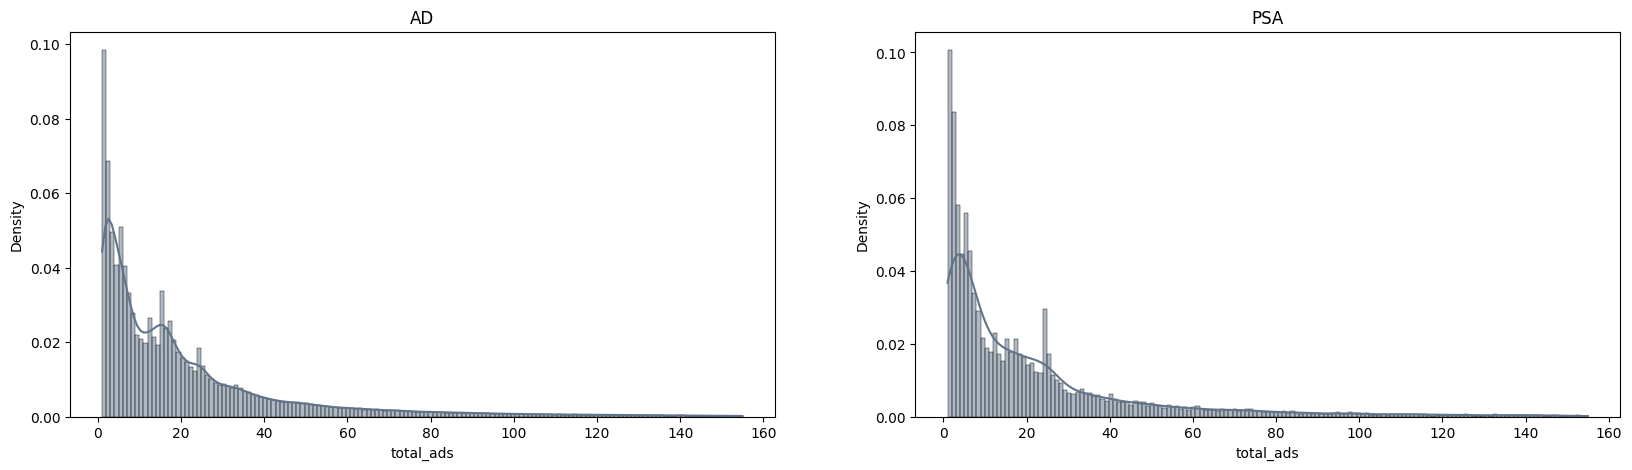

In [36]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
sns.histplot(data = market[market['test_group'] == 'ad'], x='total_ads', ax = ax[0], kde = True, stat="density",
             bins = market[market['test_group'] == 'ad']['total_ads'].max(), color = colors[0])
sns.histplot(data = market[market['test_group'] == 'psa'], x='total_ads', ax = ax[1], kde = True, stat="density",
             bins = market[market['test_group'] == 'psa']['total_ads'].max(), color = colors[0])
ax[0].set_title('AD')
ax[1].set_title('PSA')
# PSA has higher peaks in first 5 bars, showing a more concentrated distribution

## 5.3 Peak Hour within one day
Line Graph - Find the peak hour within one day between two groups

* **Finding**:

The line graph showed that PSA group had higher peak, which means that PSA was more concentrated distributed. In both groups, 12 noon was the hour having the most ads seen by person(i.e. Impression), and 5AM was the hour having least ads seen by person.

Text(0.5, 1.0, 'Proportions of Most Ads Hour in Each Group')

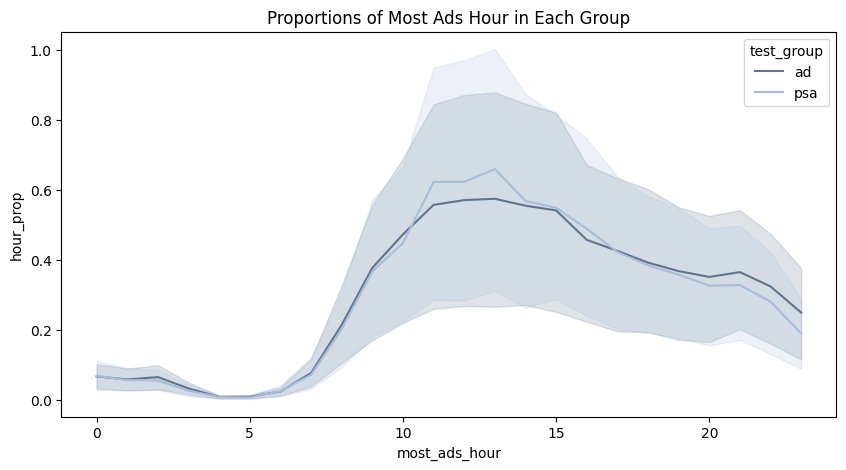

In [37]:
colors = ["#61748C", "#A7BDD9"]

fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(data = pivot_df, x = 'most_ads_hour', y = 'hour_prop', hue = 'test_group', palette=colors)
ax.set_title('Proportions of Most Ads Hour in Each Group')

# PSA has higher peak, showing a more concentrated distribution
# Both groups have most ads hour(Impression) peak in 12PM.

## 5.4 Peak impression day within one week

Histogram - Inspect the popular impression day within one week

* **Finding**:

The histogram graph showed that for AD group (experimental group), Friday is the highest viewed day, and the distribution is similar among each day.

For PSA group (control group), Thursday is the highest viewed day, while the distribution is peaked from Wednesday to Friday, and weekends are the least popular days among a week.

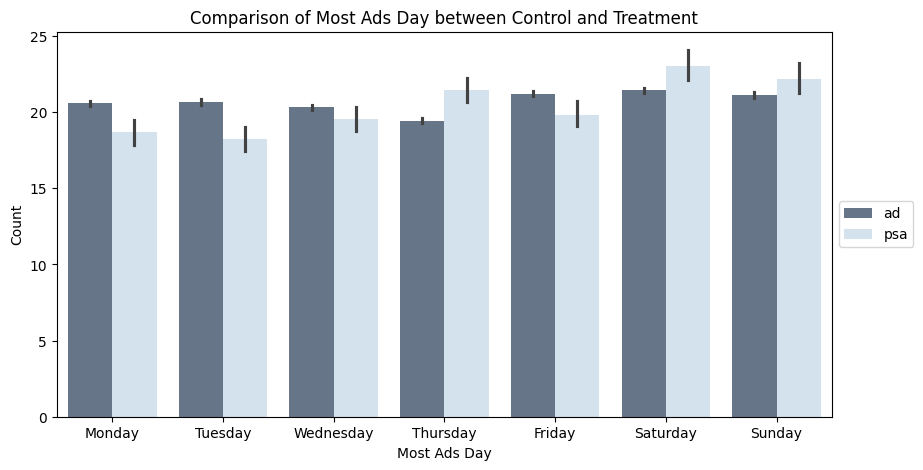

In [38]:
# Define figure size
plt.subplots(figsize = (10,5))

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
colors = ["#61748C", "#D0E2F2"]

sns.barplot(data=market, x='most_ads_day', y='total_ads', hue='test_group', order=days_order, palette=colors)

# Add legends, labels, and titles
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Comparison of Most Ads Day between Control and Treatment')
plt.xlabel('Most Ads Day')
plt.ylabel('Count')

plt.show()

In [39]:
convert_df = market.loc[market['converted'] == True].groupby('test_group')['most_ads_day'].value_counts(normalize = True).rename('percentage').reset_index()
convert_df.rename({'level_1':'most_ads_day'}, inplace = True, axis = 1)
convert_df

,test_group,most_ads_day,percentage
0,ad,Monday,0.192905
1,ad,Tuesday,0.159603
2,ad,Sunday,0.141050
3,ad,Wednesday,0.137867
4,ad,Friday,0.135227
5,ad,Thursday,0.118382
6,ad,Saturday,0.114967
7,psa,Thursday,0.189944
8,psa,Monday,0.184358
9,psa,Sunday,0.153631


In [40]:
nonconvert_df = market.loc[market['converted'] == False].groupby('test_group')['most_ads_day'].value_counts(normalize = True).rename('percentage').reset_index()
nonconvert_df.rename({'level_1':'most_ads_day'}, inplace = True, axis = 1)
nonconvert_df

,test_group,most_ads_day,percentage
0,ad,Friday,0.157029
1,ad,Monday,0.146635
2,ad,Sunday,0.146330
3,ad,Thursday,0.140780
4,ad,Saturday,0.140324
5,ad,Wednesday,0.137098
6,ad,Tuesday,0.131804
7,psa,Thursday,0.165096
8,psa,Friday,0.161574
9,psa,Wednesday,0.149159


## 5.5 Findings for conversion group

1. **Monday Advertisement Impact**: The bar chart indicates that individuals who purchase products are notably more inclined to engage with advertisements on Mondays. Consequently, the company may consider amplifying advertisement efforts on Mondays or adjusting advertisement pricing strategies to capitalize on this trend.

2. **Saturday Engagement**: Both the AD and PSA groups exhibit minimal impressions on Saturdays, suggesting suboptimal performance of advertisements and other campaigns on this day. Further investigation into the reasons behind this lackluster engagement on Saturdays is warranted.

3. **Tuesday and Thursday Trends**: Tuesdays witness a significant disparity between AD and PSA impressions, with AD impressions notably surpassing those of the PSA group. Conversely, Thursdays present the most pronounced divergence in impression rates between the two groups, with the PSA group demonstrating substantially higher impressions. Delving deeper into these discrepancies can provide valuable insights for optimizing campaign strategies.

**Next Steps**:

The marketing team should delve into the reasons behind the reduced engagement on Saturdays to identify potential improvements. Additionally, further exploration into the notable discrepancies observed on Tuesdays and Thursdays can uncover actionable insights for refining advertisement deployment strategies and enhancing overall campaign effectiveness.


Text(0.5, 1.0, 'Conversion of Most Ads Day in Each Group')

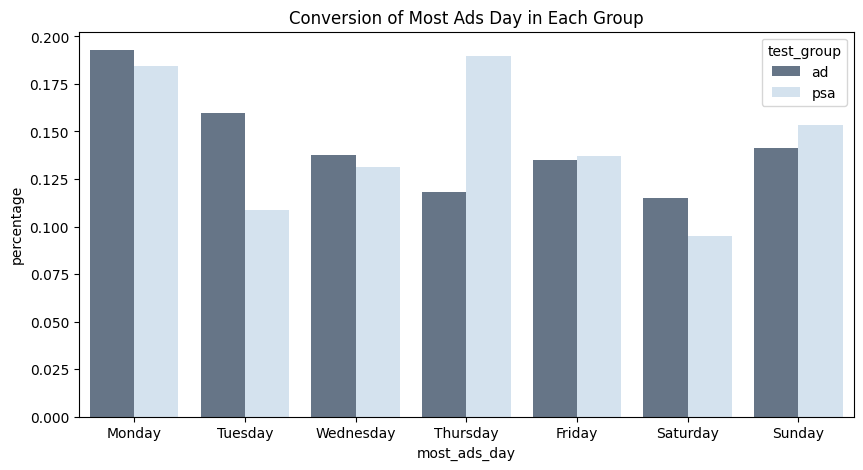

In [49]:
# Conversion of Most Ads Day in Each Group
fig, ax = plt.subplots(figsize = (10,5))

# Create the barplot with the custom color palette
sns.barplot(data=convert_df, x='most_ads_day', y='percentage', hue='test_group',order=days_order, palette=colors)


ax.set_title('Conversion of Most Ads Day in Each Group')



---



## 5.6 Findings for Non-conversion group

1. **Friday Impressions**: Across both groups, non-buyers exhibited a notable surge in AD/PSA impressions on Fridays. This suggests potential inefficacy of advertisements and public service announcements on Fridays.

2. **Saturday Disparity**: Saturdays saw a significant disparity between the AD and PSA groups, with AD impressions markedly exceeding those of the PSA group. This indicates a preference for advertisements over PSA content on Saturdays.

3. **Thursday Variation**: Conversely, Thursdays revealed the most pronounced discrepancy in impression rates between the two groups, with the PSA group showing notably higher impressions. Further investigation into this discrepancy is warranted to uncover potential factors contributing to this variance.

**Next Steps**:

The marketing team should explore the reasons behind the elevated impression rates within the PSA group and the significant gap observed on Thursdays. Understanding these factors can inform strategies to optimize campaign performance and address potential conversion barriers.





Text(0.5, 1.0, 'Non-conversion of Most Ads Day in Each Group')

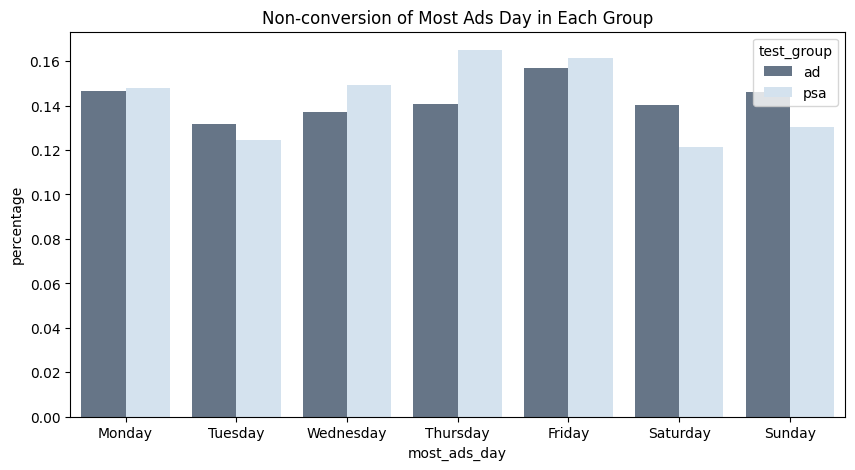

In [50]:
# Non-conversion of Most Ads Day in Each Group
fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(data = nonconvert_df, x = 'most_ads_day', y ='percentage', hue = 'test_group',order=days_order, palette=colors)
ax.set_title('Non-conversion of Most Ads Day in Each Group')



---



## 5.7 Bootstrap to reduce the sample variation
In the previous part, it showed that the AD converted rate was 2.32%, and the PSA converted rate was 1.55%. To ensure the differences between the two groups, I used bootstrap to resampled the data 10,000 times and calculate the average converted rate.
The variation in bootstrap sampling would indicate **how uncertain the average converted rates were in both groups**. Our hypothesis in this test was that people seeing advertisements were more likely to purchase compared to those seeing public service announcements or nothing.

**Bootstrap Steps:**

1. Decide the iteration number(k) of bootstrap. Usually, k is at least 100. Here, we set k = 10000.
2. For each bootstrap, we create one list to store the random sampling with replacement. This list stores as many as samples as the initial one.
3. Calculate the target matric on the new sampling dataset.
4. Use the total k numbers of value(target matric) to test the statistical significance.

In [43]:
boot_list = []
iteration = 10000
for i in range(iteration):
  boot_mean = round(market.sample(frac = 1, replace = True).groupby('test_group')['converted'].mean()*100,4)
  boot_list.append(boot_mean)

In [54]:
# Convert to DataFrame
boot_df = pd.DataFrame(boot_list)
print(boot_df.head())

test_group      ad     psa
converted   2.3054  1.6921
converted   2.3244  1.4797
converted   2.3106  1.6370
converted   2.3231  1.6318
converted   2.3045  1.5802


Text(0, 0.5, 'Frequency')

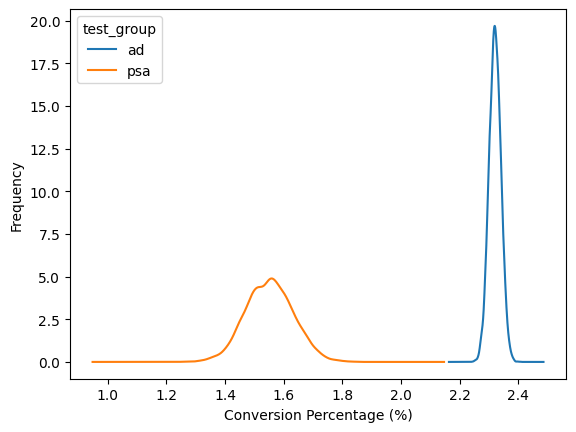

In [55]:
# A Kernel Density Estimate plot of the bootstrap distributions
ax = boot_df.plot(kind='kde')
ax.set_xlabel('Conversion Percentage (%)')
ax.set_ylabel('Frequency')

In [56]:
# Calculate the % differences of converted rates between AB groups
boot_df['Diff'] = (boot_df['ad'] - boot_df['psa'])/boot_df['psa']*100
print(boot_df['Diff'].head())

converted    36.244903
converted    57.085896
converted    41.148442
converted    42.364260
converted    45.835970
Name: Diff, dtype: float64


Text(0.5, 0, '% difference in means')

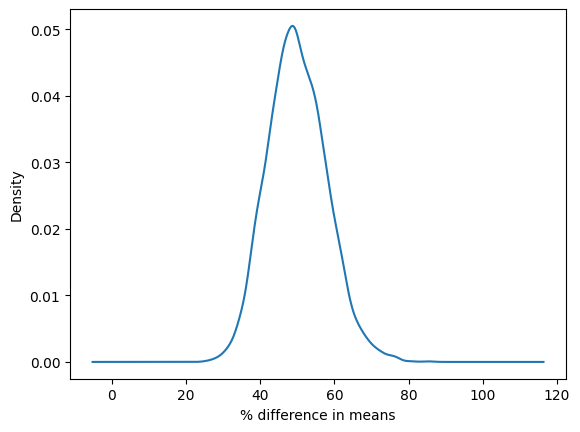

In [57]:
# Ploting the bootstrap % difference
ax = boot_df['Diff'].plot(kind='kde')
ax.set_xlabel('% difference in means')

In [48]:
# Calculate the probability of converted rate in "AD" group(treatment group) is greater than that in "PSA" group(control group)
Prob = boot_df[boot_df['Diff']>=0]['Diff'].count()/len(boot_df)
print(f"Probaility: {Prob}")

Probaility: 1.0




**Analysis Summary**:

1. **Statistical Significance**: The analysis revealed a statistically significant disparity in conversion rates between the "AD" and "PSA" groups. Specifically, the probability of conversion in the "AD" group exceeded that of the "PSA" group by 100%, indicating a robust difference between the two cohorts.

2. **Mean Difference**: The average difference in conversion rates between the two groups was approximately 40%. This substantial margin underscores the significance of the observed disparity and highlights the efficacy of the "AD" campaign in driving conversions.


**Key Insights**:

The pronounced difference in conversion rates between the "AD" and "PSA" groups underscores the effectiveness of the "AD" campaign in eliciting user engagement and driving conversions.

These findings underscore the importance of strategic advertisement deployment and provide actionable insights for optimizing future campaign strategies to maximize conversion rates and enhance overall campaign performance.






# **6. Conclusion**
The result from bootstrap showed that the converted rate in treatment group(AD) was statistically greater than that in control group(PSA).
Thus, the conclusion was that people **seeing advertisements would more likely to buy the product** compared to compared to seeing public service announcements or nothing.



## **Key Recommendations**

1. The analysis highlights a correlation between product purchases and advertisement views on Mondays, suggesting an opportunity for targeted ad campaigns during peak engagement hours, particularly from 10 AM to 3 PM

2. Optimize campaign strategies to enhance low impression rates on Saturdays, potentially reallocating resources or adjusting messaging to enhance weekend engagement.

3. Further investigation into high PSA impressions and the significant Thursday gap is recommended to address conversion challenges and optimize campaign effectiveness.